## <center>Google Trend Data
### <center>Econ 442B Project
### <center>Members: Yiran Sun, Cristian Martinez, and Yuxi Ma
***

In this report, we focus on,.....
<br><br>

Firstly, we would use `GloVe Word Vectors` to identify most relevant keywords of **Umemployment"**. Then, `Google Trend` would help us get the search data of those words in the past five years. After some preparation of data, we could start model building and evaluation.
<br><br>

Our main nowcast model will be based on Lasso Regression.



In [2]:
# Loading necessary packages for analysis
import pytrends
import datetime
import time
import os
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

from datetime import date
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from pytrends.request import TrendReq
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso, ElasticNet
from scipy import spatial

### <center> Part I: Keyword Choosing
***
Here we would firstly use some of the output words as our keywords for the following parts.
    

In [5]:
embeddings_dict = {}
with open("glove.6B.50d.txt", 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        token = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[token] = vector

def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda 
                  token: spatial.distance.euclidean(embeddings_dict[token], embedding))

UN = (find_closest_embeddings(embeddings_dict["unemployment"])[:100])
print(UN)

['unemployment', 'jobless', 'joblessness', 'recession', 'inflation', 'rate', 'rise', 'incomes', 'rates', 'rising', 'economy', 'employment', 'decline', 'wages', 'declining', 'spending', 'risen', 'slowing', 'shrinking', 'slowdown', 'increase', 'worsening', 'wage', 'poverty', 'lowest', 'dramatically', 'borrowing', 'deficit', 'slowed', 'shrink', 'decrease', 'increases', 'drop', 'worries', 'deficits', 'poor', 'labor', 'increased', 'worsen', 'downturn', 'gap', 'trend', 'sluggish', 'fall', 'cuts', 'surplus', 'growth', 'increasing', 'gdp', 'pressures', 'stagnating', 'shortfall', 'projected', 'unemployed', 'shrank', 'slashed', 'easing', 'falling', 'expectations', 'surge', 'rises', 'estimates', 'unexpectedly', 'adjusted', 'higher', 'productivity', 'significantly', 'worse', 'proportion', 'eurozone', 'worsened', 'stagnant', 'stagnation', 'reducing', 'lag', 'income', 'accelerating', 'credit', 'jobs', 'alarming', 'decade', 'costs', 'growing', 'steadily', 'crisis', 'raising', 'fiscal', 'demand', 'sha

### <center> Part II: Data Gathering
***
With chosen keywords, we could gather data from `Google Trend`.

In [54]:
# Establishing Keyword List
kw_list = ["jobs", "fired", "lost", "new", "benefits"] 
kw_list2 = ["popular", "hiring", "claims","application","help"]
kw_list3 = ["wanted","top","places","reviews","government"]
kw_list4 = ["assistance","unemployed","work","labor","checks"]
kw_list5 = ["poor", "worried", "afford", "food", "jobless"]
kw_list6 = ["income", "cheap", "borrowing", "borrowed", "struggling"]
kw_list7 = ["poverty", "paycheck", "woes", "wage", "depressed"]
kw_list8 = ["downturn", "coworker", "cut", "slashed", "spending"]
kw_list9 = ["clothes", "confused", "shocked", "hungry", "searching"]
kw_list10 = ["rising", "discouraged", "decreasing","hoping","miracle"]

# Creating separate access points to gain access to Google Trends API
pytrends1 = TrendReq(hl="en-US", tz=360, retries=10, backoff_factor=10)
pytrends2 = TrendReq(hl="en-US", tz=360, retries=10, backoff_factor=10)
pytrends3 = TrendReq(hl="en-US", tz=360, retries=10, backoff_factor=10)
pytrends4 = TrendReq(hl="en-US", tz=360, retries=10, backoff_factor=10)
pytrends5 = TrendReq(hl="en-US", tz=360, retries=10, backoff_factor=10)
pytrends6 = TrendReq(hl="en-US", tz=360, retries=10, backoff_factor=10)
pytrends7 = TrendReq(hl="en-US", tz=360, retries=10, backoff_factor=10)
pytrends8 = TrendReq(hl="en-US", tz=360, retries=10, backoff_factor=10)
pytrends9 = TrendReq(hl="en-US", tz=360, retries=10, backoff_factor=10)
pytrends10 = TrendReq(hl="en-US", tz=360, retries=10, backoff_factor=10)

# Building Pay_loads to specify parameters of where to grab the data and associated keyword list
pytrends1.build_payload(kw_list, geo='US', timeframe = 'today 5-y')
pytrends2.build_payload(kw_list2, geo='US', timeframe = 'today 5-y')
pytrends3.build_payload(kw_list3, geo='US', timeframe = 'today 5-y')
pytrends4.build_payload(kw_list4, geo='US', timeframe = 'today 5-y')
pytrends5.build_payload(kw_list5, geo='US', timeframe = 'today 5-y')
pytrends6.build_payload(kw_list6, geo='US', timeframe = 'today 5-y')
pytrends7.build_payload(kw_list7, geo='US', timeframe = 'today 5-y')
pytrends8.build_payload(kw_list8, geo='US', timeframe = 'today 5-y')
pytrends9.build_payload(kw_list9, geo='US', timeframe = 'today 5-y')
pytrends10.build_payload(kw_list10, geo='US', timeframe = 'today 5-y')

# grabbing the data that is represented graphically on Google Trends
data = pytrends1.interest_over_time()
data2 = pytrends2.interest_over_time()
data3 = pytrends3.interest_over_time()
data4 = pytrends4.interest_over_time()
data5 = pytrends5.interest_over_time()
data6 = pytrends6.interest_over_time()
data7 = pytrends7.interest_over_time()
data8 = pytrends8.interest_over_time()
data9 = pytrends9.interest_over_time()
data10 = pytrends10.interest_over_time()

#### <center>Data Prepping
***
After making sure our data presents as we expects, we combine the **Unemployment Claims** into the dataset as **Claims**, which is our dependent variable.


In [136]:
# Combining all the dataframes into a Master Data frame
Master = pd.concat([data,data2,data3,data4, data5,data6,data7,data8,data9,data10],
                   axis=1)

# Re- indexing dataframe to show only data that we want
Master = Master[0:]
Master

,jobs,fired,lost,new,benefits,isPartial,popular,hiring,claims,application,...,shocked,hungry,searching,isPartial,rising,discouraged,decreasing,hoping,miracle,isPartial
date,,,,,,,,,,,,,,,,,,,,,
2016-02-21,17,1,3,48,4,False,5,3,2,9,...,2,25,5,False,54,1,7,3,46,False
2016-02-28,16,1,3,47,4,False,5,3,2,9,...,2,28,5,False,54,2,6,4,47,False
2016-03-06,16,1,3,50,4,False,5,2,2,8,...,2,26,4,False,56,2,5,4,45,False
2016-03-13,16,1,3,48,4,False,5,2,2,9,...,2,25,4,False,51,1,5,4,49,False
2016-03-20,16,0,3,48,4,False,5,2,2,8,...,3,27,4,False,54,1,6,3,51,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-17,15,1,3,44,5,False,5,4,2,8,...,2,22,3,False,82,1,6,3,38,False
2021-01-24,15,1,3,43,6,False,5,4,2,7,...,2,23,4,False,86,2,6,3,38,False
2021-01-31,15,1,3,45,6,False,5,4,2,7,...,2,23,4,False,81,1,7,4,43,False


In [ ]:
# Exporting to Excel to make sure everything is represented
Master.to_excel("Output.xlsx")

In [13]:
# Re-loading data set to conduct analysis
Data = pd.ExcelFile('Output.xlsx')
Data = pd.read_excel(Data)
Data

,date,jobs,fired,lost,new,benefits,popular,hiring,claims,application,...,confused,shocked,hungry,searching,rising,discouraged,decreasing,hoping,miracle,Claims
0,2016-02-21,17,1,3,48,4,5,3,2,9,...,5,2,25,5,54,1,7,3,46,2612427
1,2016-02-28,16,1,3,47,4,5,3,2,9,...,7,2,28,5,54,2,6,4,47,2670398
2,2016-03-06,16,1,3,50,4,5,2,2,8,...,5,2,26,4,56,2,5,4,45,2600820
3,2016-03-13,16,1,3,48,4,5,2,2,9,...,5,2,25,4,51,1,5,4,49,2548304
4,2016-03-20,16,0,3,48,4,5,2,2,8,...,6,3,27,4,54,1,6,3,51,2492144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,2020-02-23,17,1,3,45,4,5,4,2,8,...,5,2,23,4,100,2,6,4,64,2061669
210,2020-03-01,16,1,3,49,4,5,4,2,8,...,5,2,21,4,90,2,7,3,40,2105457
211,2020-03-08,15,1,3,49,4,5,3,2,7,...,5,2,21,4,70,1,7,4,41,2057280
212,2020-03-15,14,1,3,52,5,4,5,2,7,...,5,2,19,3,64,1,6,3,40,1977272


In [14]:
# Changing date variable to reflect month day and year instead of UTC
Data["date"] = pd.to_datetime(Data["date"], format="%m/%d/%y")
Data = Data.set_index("date")

In [28]:
# Breaking data into testing and training sets, holding two year sample 
X = Data.iloc[:,0:50]
y = Data[["Claims"]]

# Scaling y
min_y = y.min()
denom = y.max() - min_y
y = (y - min_y) / denom

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 105, 
                                                    shuffle=False)

<br>

And splitting the dataset into training and testing sample, holding 2-year data out, we would be able to start our analysis.
<br>


### <center> Part III: Model Fitting(Lasso Regression) and Evaluation
***
Lasso Regression is a great model for Nowcast and is also able to help us to identify the best estimating independent features. After fitting the model, we would carefully evaluate our model to see if it predicts well.

In [35]:
# Step 1 : Fit Lasso
lasso = Lasso().fit(X_train, y_train)

In [37]:
# Step 2 : Create a grid containing the potential values of lambdas
lasso_lambdas = {'alpha':np.linspace(0.01, 0.6, 60)}

lasso_best = GridSearchCV(lasso, lasso_lambdas, cv=5, 
                          scoring = 'neg_mean_squared_error').fit(X_train, y_train)

lasso_best.best_estimator_

Lasso(alpha=0.060000000000000005)

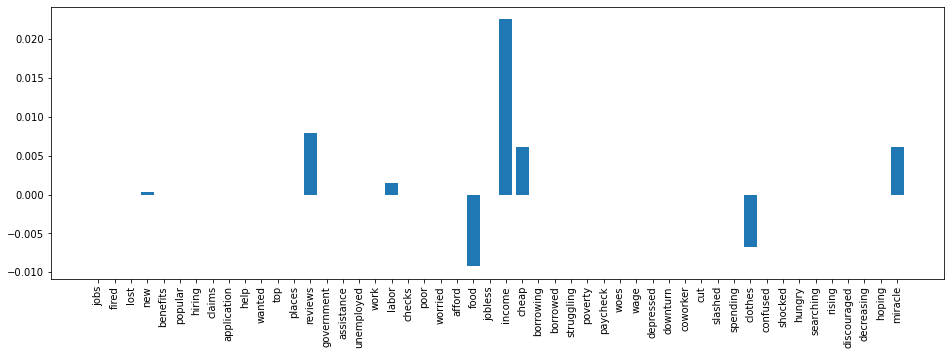

In [38]:
# Step 3 : See the magnitude of the coefficients
# Setting the the best estimator to be alpha
lasso_coef = lasso_best.best_estimator_.coef_

plt.figure(figsize=(16,5))
plt.bar(X.columns.values.tolist(), lasso_coef.tolist())
plt.xticks(rotation='vertical')
plt.show()

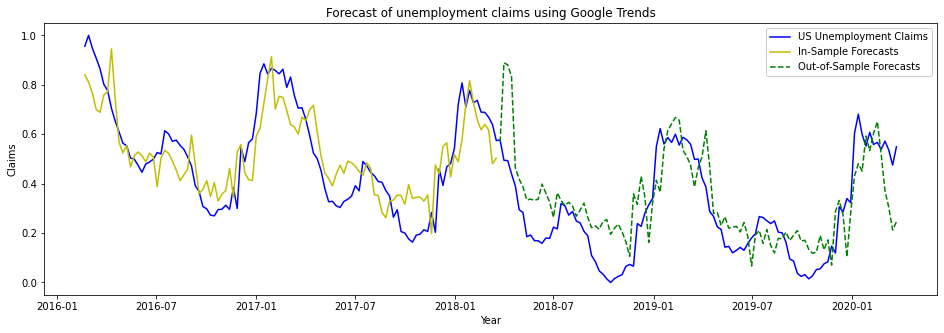

In [39]:
# Step 4 : Forecast using the test data
y_pred_in = lasso_best.predict(X_train)
y_pred_out = lasso_best.predict(X_test)

# Plot
plt.figure(figsize=(16,5))
plt.plot(y.index, y, color='b', label='US Unemployment Claims')
plt.plot(y_train.index, y_pred_in, color = 'y', label = 'In-Sample Forecasts')
plt.plot(y_test.index, y_pred_out, ls='--', color = 'g', 
         label = 'Out-of-Sample Forecasts')
plt.gca().set(title="Forecast of unemployment claims using Google Trends", 
              xlabel="Year", ylabel="Claims")
plt.legend(framealpha=1, frameon=True)
plt.show()

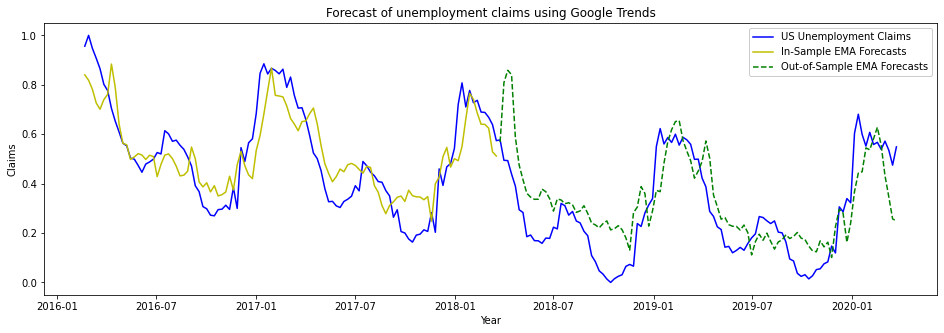

In [51]:
# Step 5: Fit an EMA
ema_in = pd.DataFrame(y_pred_in).ewm(span=2, adjust=True).mean()
ema_out = pd.DataFrame(y_pred_out).ewm(span=2, adjust=True).mean()

# Plot the new prediction 
plt.figure(figsize=(16,5))
plt.plot(y.index, y, color='b', label='US Unemployment Claims')
plt.plot(y_train.index, ema_in, color = 'y', label = 'In-Sample EMA Forecasts')
plt.plot(y_test.index, ema_out, ls='--', color = 'g', 
         label = 'Out-of-Sample EMA Forecasts')
plt.gca().set(title="Forecast of unemployment claims using Google Trends", 
              xlabel="Year", ylabel="Claims")
plt.legend(framealpha=1, frameon=True)
plt.show()

In [40]:
# Step 6 : Calculate Metrics - MSE
in_sample_mse = round(mean_squared_error(y_train, y_pred_in),6)
out_sample_mse = round(mean_squared_error(y_test, y_pred_out),6)
print('Lasso In-Sample MSE : ', in_sample_mse ,
      '\nLasso Out-of-Sample MSE : ', out_sample_mse)

Lasso In-Sample MSE :  0.013286 
Lasso Out-of-Sample MSE :  0.020809


In [52]:
in_ema_mse = round(mean_squared_error(y_train, ema_in),6)
out_ema_mse = round(mean_squared_error(y_test, ema_out),6)
print('Lasso In-Sample EMA MSE : ', in_ema_mse,
      '\nLasso Out-of-Sample EMA MSE : ', out_ema_mse)

Lasso In-Sample EMA MSE :  0.011852 
Lasso Out-of-Sample EMA MSE :  0.019592
